In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shraddha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shraddha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\Shraddha\Downloads\archive (2)\Tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
#Convert tweet_created to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [10]:
#Text preprocessing
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = text.lower()
    return text
df['clean_text'] = df['text'].apply(clean_text)

In [11]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered = [w for w in words if w not in stop_words]
    return ' '.join(filtered)
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

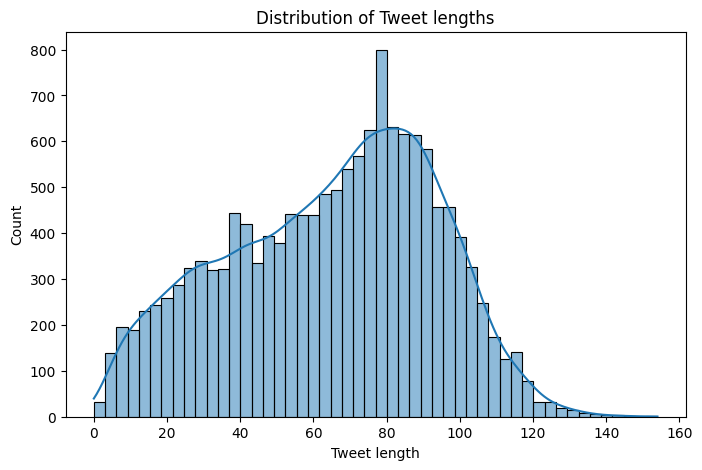

In [12]:
#EDA
#Distribution of tweet lengths
df['text_length'] = df['clean_text'].apply(lambda x: len(x))
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'],bins=50,kde=True)
plt.title("Distribution of Tweet lengths")
plt.xlabel("Tweet length")
plt.ylabel("Count")
plt.savefig('images/tweet_length_distribution.png')
plt.show()

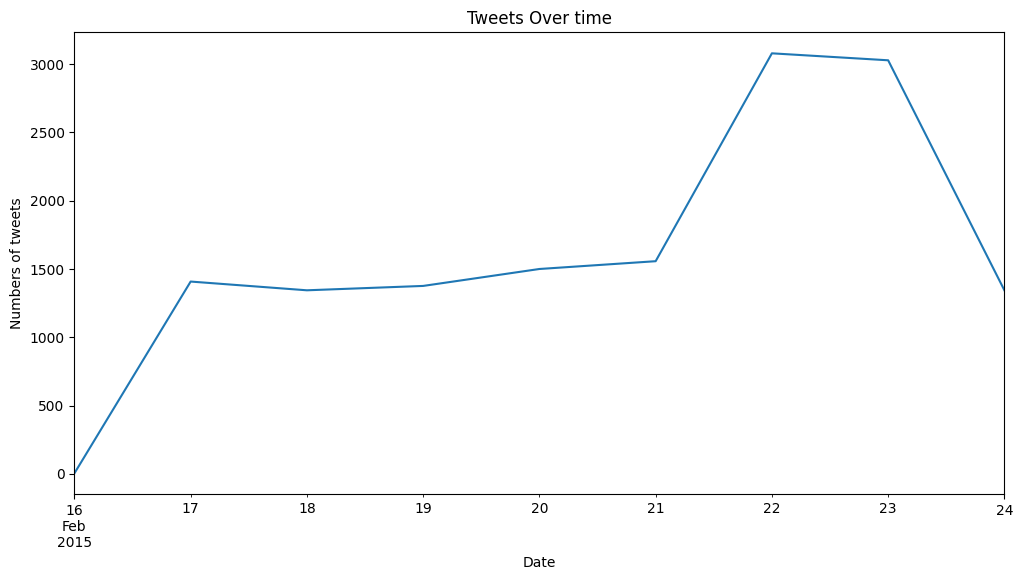

In [13]:
#tweets over time
df.set_index('tweet_created',inplace=True)
tweets_per_day = df.resample('D').count()['text']
plt.figure(figsize=(12,6))
tweets_per_day.plot()
plt.xlabel('Date')
plt.ylabel('Numbers of tweets')
plt.title("Tweets Over time")
plt.savefig('images/tweets_over_time.png')  
plt.show()

In [14]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_location',
       'user_timezone', 'clean_text', 'text_length'],
      dtype='object')

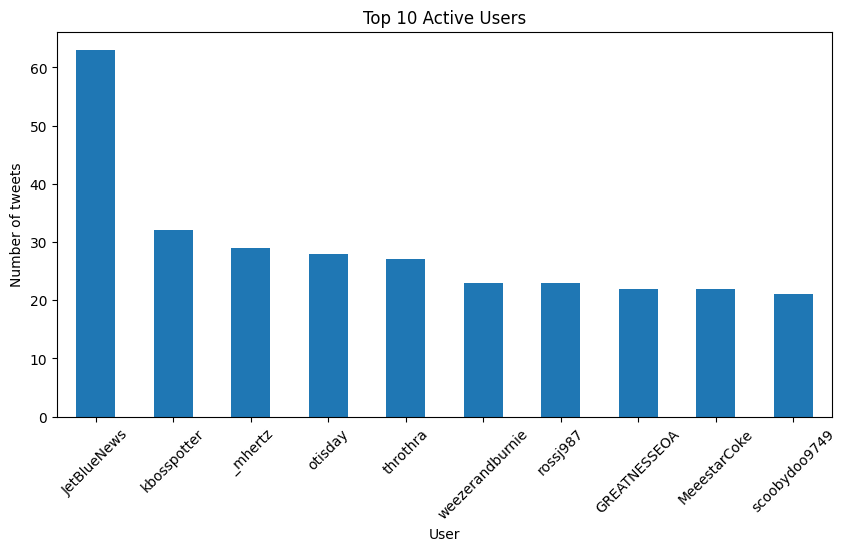

In [15]:
#Top 10 active users
plt.figure(figsize=(10,5))
df['name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Active Users')
plt.xlabel('User')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.savefig('images/top_10_active_users.png')
plt.show()

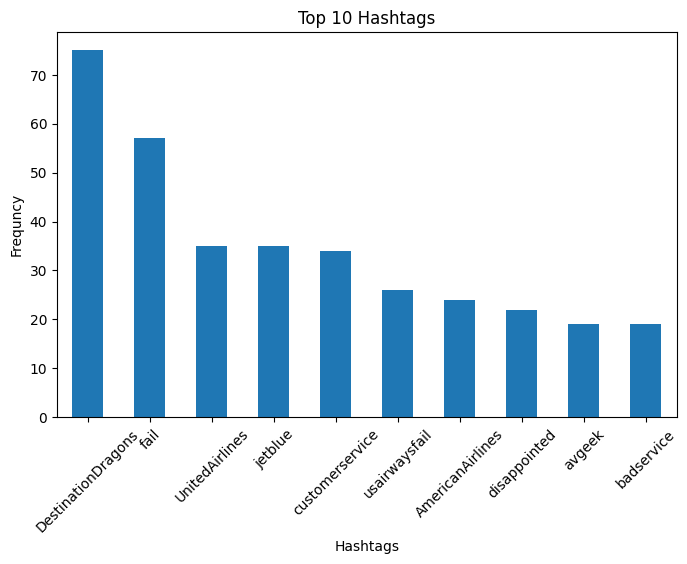

In [16]:
#Most common hashtags
hashtags = re.findall(r"#(\w+)", ''.join(df['text']))
hashtags_series = pd.Series(hashtags)
top_hashtags = hashtags_series.value_counts().head(10)
plt.figure(figsize=(8,5))
top_hashtags.plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequncy')
plt.xticks(rotation=45)
plt.savefig('images/top_10_hashtags.png')
plt.show()

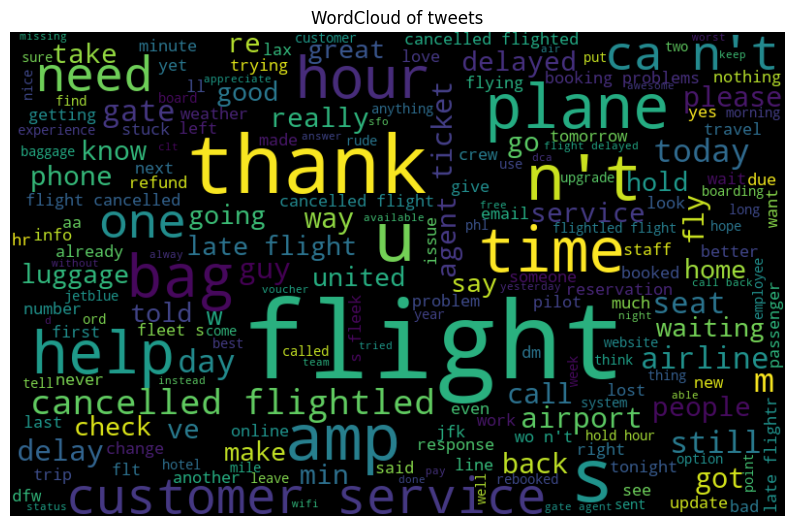

In [17]:
#Word Cloud
all_words = ''.join([text for text in df['clean_text']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of tweets")
plt.savefig('images/wordcloud_of_tweets.png', bbox_inches='tight')
plt.show()

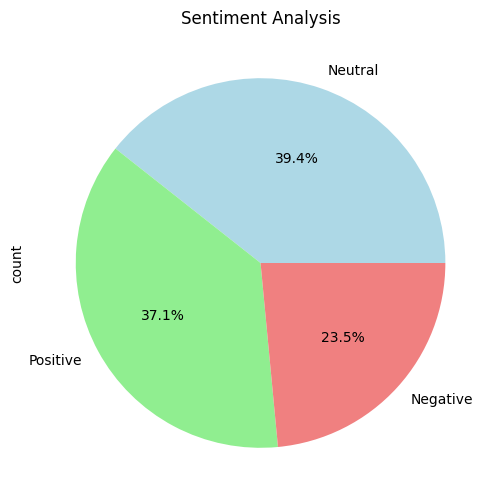

In [18]:
#Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity >0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'
df['sentiment'] = df['clean_text'].apply(get_sentiment)
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct="%1.1f%%",colors=['lightblue','lightgreen','lightcoral'])
plt.title("Sentiment Analysis")
plt.savefig('images/Sentiment_Analysis.png')
plt.show()                                     

In [19]:
#Save Cleaned Dataset
df.to_csv('data/cleaned_tweets.csv')
print("Cleaned  data saved!")

Cleaned  data saved!
